In [3]:
# Importing important libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Importing all datasets
lead = pd.read_csv('Leads.csv')

## Inspecting the Dataframe

In [5]:
# Let's see the head of our dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# check the size of dataset.
lead.shape

(9240, 37)

In [7]:
#Check the data types of dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data preparation

#### Converting some binary variables (Yes/No) to 0/1

In [8]:
varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
           ,'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

#defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

#Applying functions on variables
lead[varlist] = lead[varlist].apply(binary_map)

In [9]:
#Let's check the dataset again
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [10]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#Lets check if there is null value or not.
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#Let's check null value in percentage.
round((((lead.isnull().sum())/len(lead))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we can see there is null value present in dataset. So,we need to drop some column of null values. Let's set the 35% cut-off
for null values.We will drop the column which have 35% above null values.

In [13]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
                 'Tags','Lead Quality'],1)

In [14]:
round((((lead.isnull().sum())/len(lead))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

For other columns,which have null values less than 35%, we will impute them.

In [15]:
# Check for unique values in dataset
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

We need to drop 'Prospect ID' and 'Lead Number'. Also,let's drop 'Last Notable Activity', it is same as 'Last Activity' and also it didn't give much of information.

In [16]:
lead = lead.drop(['Prospect ID','Lead Number','Last Notable Activity'],1)

In [17]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

## Checking Balance In Dataset Columns

In this we will check the categorical columns with distribution of data in column and we will remove the most imbalance columns.

#### Lead Origin

In [18]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

It is balance between values of dataset.

#### Lead Source

In [19]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We need to organise the other categorise which have less value counts into one category.

In [20]:
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat',
                                   'youtubechannel','testone','Pay per Click Ads','welearnblog_Home',
                                   'WeLearn','blog','NC_EDM'], 'Others')

In [21]:
lead['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                83
Name: Lead Source, dtype: int64

It is also have balance dataset values.

#### Do Not Email

In [22]:
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

This variable we need to drop due to its imbalance data distribution.

#### Do Not Call

In [23]:
lead['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

This variable we need to drop due to its imbalance data distribution.

#### Converted

In [24]:
lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

#### Last Activity

In [25]:
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

It is also balance variable for value in dataset.

#### Country

In [26]:
(lead['Country'].value_counts()/ len(lead['Country']))*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

By looking at country variable we can say it is mainly focused on country 'India'.We  can  not  get the  information other than country 'India'.The most values are saturated in 'India'.

####  Specialization


In [27]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

If we ignore 'Select' category, the data is distributed in all category of specialization is in balance.

#### How did you hear about X Education

In [28]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [29]:
lead['How did you hear about X Education'].isnull().sum()

2207

In this column it is mostly saturated in 'Select' and in null values. So, we can drop this column because 'select' category is as good as NaN.

#### What is your current occupation

In [30]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We can use this occupation column.

#### What matters most to you in choosing a course

In [31]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can drop this column due to it is saturated only in one category

#### Search

In [32]:
lead['Search'].value_counts()

0    9226
1      14
Name: Search, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Magazine

In [33]:
lead['Magazine'].value_counts()

0    9240
Name: Magazine, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Newspaper Article

In [34]:
lead['Newspaper Article'].value_counts()

0    9238
1       2
Name: Newspaper Article, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### X Education Forums

In [35]:
lead['X Education Forums'].value_counts()

0    9239
1       1
Name: X Education Forums, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Digital Advertisement

In [36]:
lead['Digital Advertisement'].value_counts()

0    9236
1       4
Name: Digital Advertisement, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Through Recommendations

In [37]:
lead['Through Recommendations'].value_counts()

0    9233
1       7
Name: Through Recommendations, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Receive More Updates About Our Courses

In [38]:
lead['Receive More Updates About Our Courses'].value_counts()

0    9240
Name: Receive More Updates About Our Courses, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Update me on Supply Chain Content

In [39]:
lead['Update me on Supply Chain Content'].value_counts()

0    9240
Name: Update me on Supply Chain Content, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Get updates on DM Content

In [40]:
lead['Get updates on DM Content'].value_counts()

0    9240
Name: Get updates on DM Content, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### Lead Profile

In [41]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### City

In [42]:
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We need to drop the 'City'  column because it does not provie information except 'Mumbai'  and  other values  are saturated  in  'Select'  category.

#### I agree to pay the amount through cheque

In [43]:
lead['I agree to pay the amount through cheque'].value_counts()

0    9240
Name: I agree to pay the amount through cheque, dtype: int64

We need to drop this column, due to imbalance in data distribution.

#### A free copy of Mastering The Interview

In [44]:
lead['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

It is well balanced variable in his category,so we can use this variable.

In [45]:
#Let's drop the imbalance variables.
lead = lead.drop(['Do Not Call','How did you hear about X Education','What matters most to you in choosing a course',
'Search','Magazine','Newspaper','Newspaper Article','X Education Forums','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
'I agree to pay the amount through cheque','City','Country'],1)





# 

# Imputing Null Values 

In  this  section  we  will  fill  the  null  values  with  'NaN'  and  also  replace  the  'City' , 'lead profile' ,   'Specialization'  columns  'Select'  values.


In [46]:
(lead.isnull().sum()/len(lead))*100

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
Lead Profile                              29.318182
A free copy of Mastering The Interview     0.000000
dtype: float64

We will drop the null values, which is less than 2% in continuous columns in 'Lead Source',  'TotalVisits' and  'Page Views Per Visit'.

In [47]:
lead.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'],axis=0,inplace=True)

#### Let's Impute Null Values

#### Specialization
We need to fill the 'Select' and null values because both are the same in 'Specialization'.

In [48]:
lead['Specialization'].replace('Select','No Specialization selection', inplace=True)

In [49]:
lead["Specialization"].fillna("No Specialization selection", inplace = True)

In [50]:
lead["Specialization"].value_counts()

No Specialization selection          3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### What is your current occupation
Let's fill the null values of "What is your current occupation" with "No occupation selection".

In [51]:
lead["What is your current occupation"].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [52]:
lead["What is your current occupation"].fillna("Unemployed", inplace = True)

In [53]:
lead["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

#### Lead Profile

In [54]:
lead["Lead Profile"].value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [55]:
lead['Lead Profile'].replace('Select','No lead profile', inplace=True)

In [56]:
lead["Lead Profile"].fillna("No lead profile", inplace = True)

In [57]:
lead["Lead Profile"].value_counts()

No lead profile                6757
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Let's check for column null values again

In [58]:
(lead.isnull().sum()/len(lead))*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Lead Profile                              0.0
A free copy of Mastering The Interview    0.0
dtype: float64

Ther is no null values present in our data set now . We can move to the EDA analysis.

# 

## Exploratory Data Analysis

### Bivariate Analysis

##### Lead Origin vs Converted

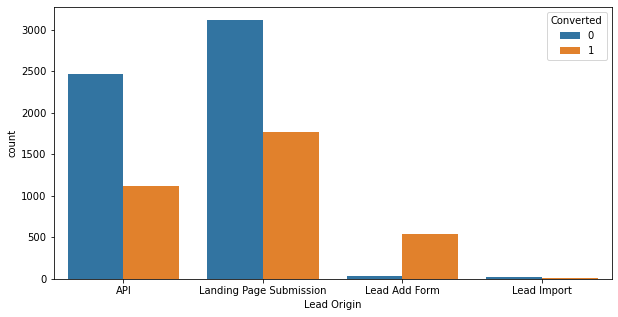

In [59]:
plt.figure(figsize=[10,5])
sns.countplot(lead['Lead Origin'],hue=lead['Converted'])
plt.xticks(rotation=0)
plt.show()

We can see that there is 'Landing Page Submission' have highest number of  converted customer  and  'not converted'  customer,but it is 'Lead Add Form' that have very good ratio of customer  'conversion' than 'non conversion' into course.

##### Lead source vs Converted

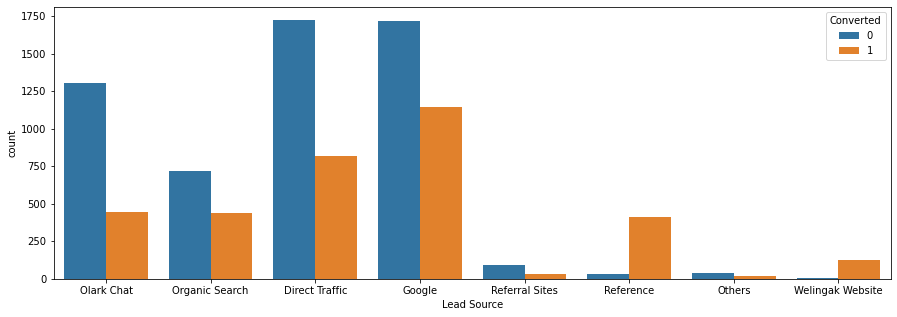

In [60]:
plt.figure(figsize=[15,5])
sns.countplot(lead['Lead Source'],hue=lead['Converted'])
plt.xticks(rotation=0)
plt.show()

In  above  we  can  see  'google' and 'direct traffic'  has most converted values.
But 'coversion' rate is high in 'Reference' and 'Welingak website' than  'non converion' rate.

##### 'Do not email' vs Converted

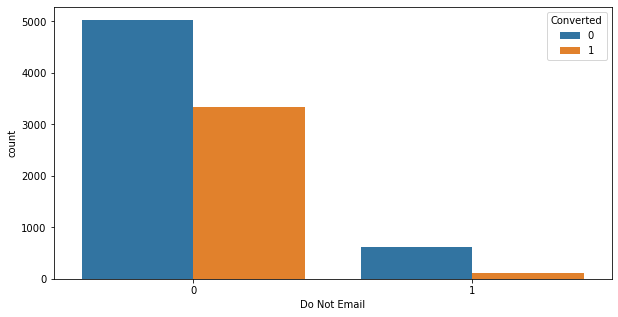

In [61]:
plt.figure(figsize=[10,5])
sns.countplot(lead['Do Not Email'],hue=lead['Converted'])
plt.xticks(rotation=0)
plt.show()

'Do not email'  has  no  effect  in  'conversion'  of  customer  in  course.

##### 'Last Activity' vs Converted

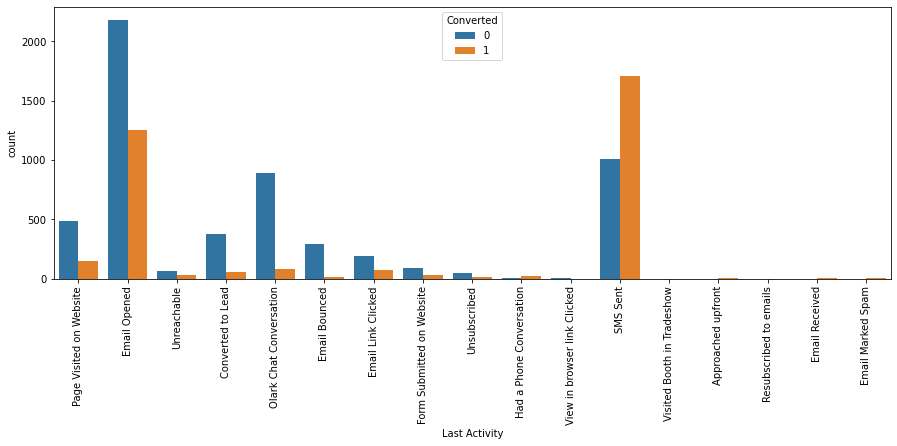

In [62]:
plt.figure(figsize=[15,5])
sns.countplot(lead['Last Activity'],hue=lead['Converted'])
plt.xticks(rotation=90)
plt.show()

'Email opened' and 'SMS sent' has high value of conversion.But 'SMS sent'  and  'Had a Phone Conversation'  has high positive rate of conversion.

##### Specialization vs Converted

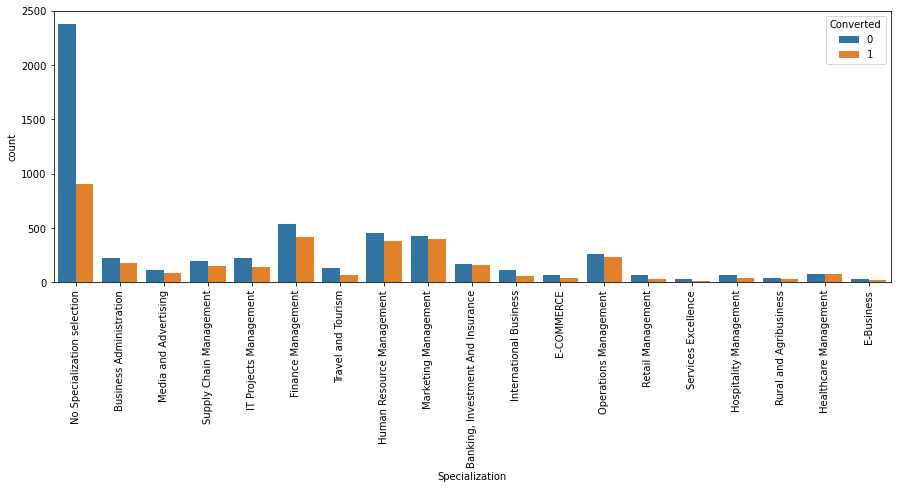

In [63]:
plt.figure(figsize=[15,5])
sns.countplot(lead['Specialization'],hue=lead['Converted'])
plt.xticks(rotation=90)
plt.show()

In  specialization  'Finance Management' , 'Human Resource Management' , 'Marketing Management'  and  'Operations Management'
has high rate of conversions in specialization.

##### 'What is your current occupation' vs Converted

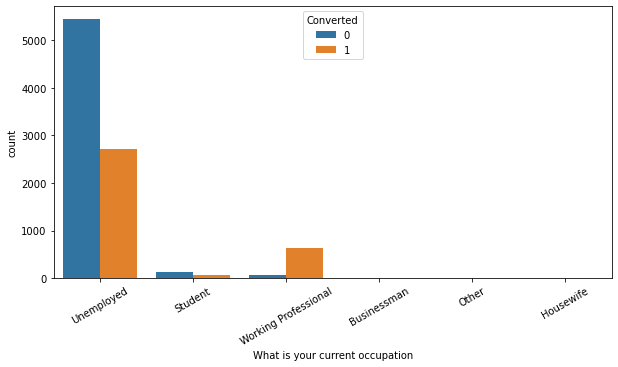

In [64]:
plt.figure(figsize=[10,5])
sns.countplot(lead['What is your current occupation'],hue=lead['Converted'])
plt.xticks(rotation=30)
plt.show()

In 'Unemployed'  has high rate of  in  'conversion' and in 'no conversion' ,  but in  'working professional' there 'conversion' rate is higher than 'no conversion' .

##### 'Lead Profile' vs Converted

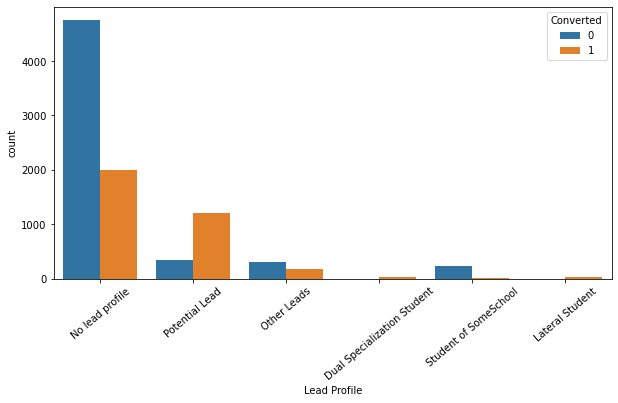

In [65]:
plt.figure(figsize=[10,5])
sns.countplot(lead['Lead Profile'],hue=lead['Converted'])
plt.xticks(rotation=40)
plt.show()

In 'lead profile'  we  have high 'conversion rate' than any other category.

##### 'A free copy of Mastering The Interview' vs Converted

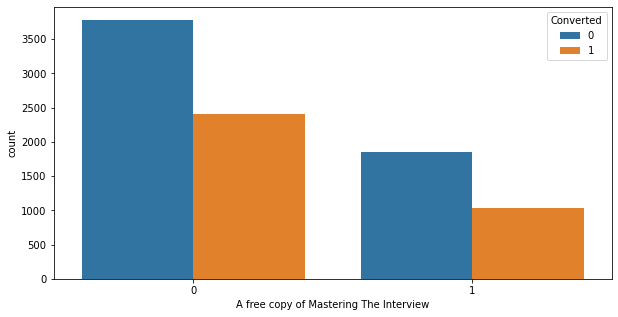

In [66]:
plt.figure(figsize=[10,5])
sns.countplot(lead['A free copy of Mastering The Interview'],hue=lead['Converted'])
plt.xticks(rotation=0)
plt.show()

'A free copy of mastering the interview' does  not  have  any effect on 'conversion'.

### Univariate Analysis

##### TotalVisits

<AxesSubplot:xlabel='TotalVisits', ylabel='Count'>

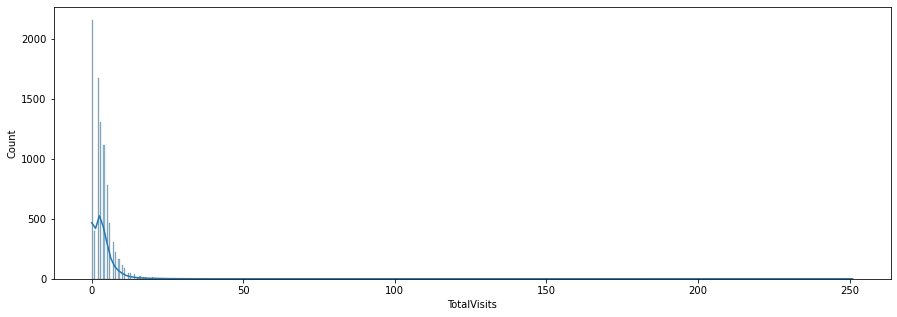

In [67]:
plt.figure(figsize=[15,5])
sns.histplot(x='TotalVisits', data=lead, kde=True)

##### Total Time Spent on Website

<AxesSubplot:xlabel='Total Time Spent on Website', ylabel='Count'>

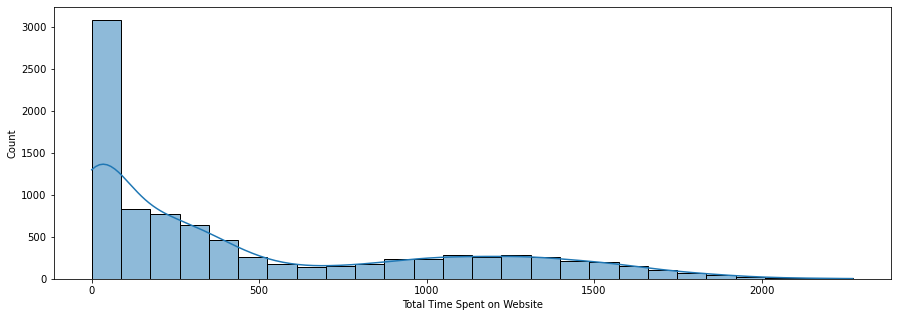

In [68]:
plt.figure(figsize=[15,5])
sns.histplot(x='Total Time Spent on Website', data=lead, kde=True)

##### Page Views Per Visit

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Count'>

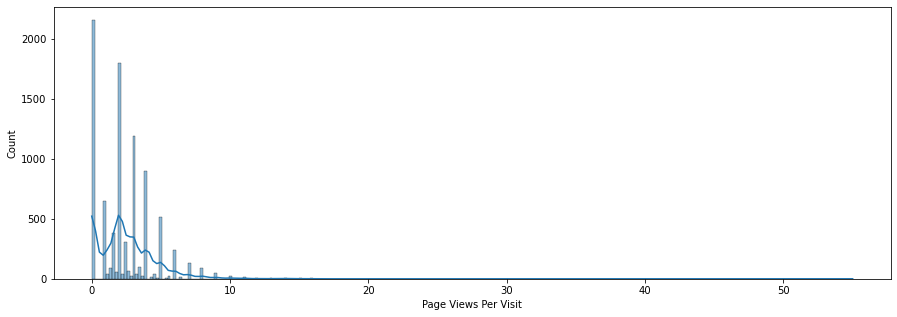

In [69]:
plt.figure(figsize=[15,5])
sns.histplot(x='Page Views Per Visit', data=lead, kde=True)

In above 'univariate analysis'  we  can  see  in  all  variables  there  is  presence  of  outliers. So,  we  need  to  treat  the outliers.

# 

## Outlier's Treatment
We  need  to  treat  outliers  in  continuous  variable.

#### Total visit

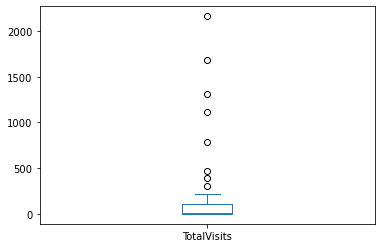

In [70]:
# Visualising the distribution of 'TotalVisits':
lead['TotalVisits'].value_counts().plot.box()
plt.show()

In [71]:
# Checking the outliers in percentages.
lead['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [72]:
# Capping the variable for outliers.
Q1 = lead['TotalVisits'].quantile(0.01)
Q3 = lead['TotalVisits'].quantile(0.85)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
lead_1 = lead.loc[(lead['TotalVisits']>lower_limit) & (lead['TotalVisits']<upper_limit)]

<AxesSubplot:xlabel='TotalVisits'>

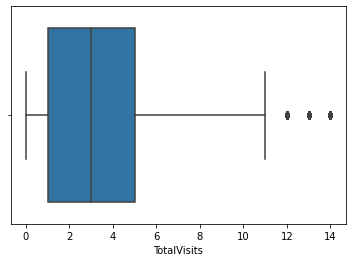

In [73]:
#Check the variable after capping the variable.
sns.boxplot(lead_1['TotalVisits'])

#### Total Time Spent on Website

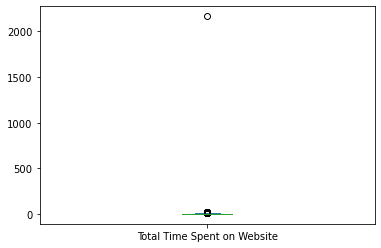

In [74]:
# Visualising the distribution of 'Total Time Spent on Website':
lead['Total Time Spent on Website'].value_counts().plot.box()
plt.show()

In [75]:
# Checking the outliers in percentages.
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [76]:
# Capping the variable for outliers.
Q1 = lead['Total Time Spent on Website'].quantile(0.01)
Q3 = lead['Total Time Spent on Website'].quantile(0.99)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
lead_1 = lead.loc[(lead['Total Time Spent on Website']>lower_limit) & (lead['Total Time Spent on Website']<upper_limit)]

<AxesSubplot:xlabel='Total Time Spent on Website'>

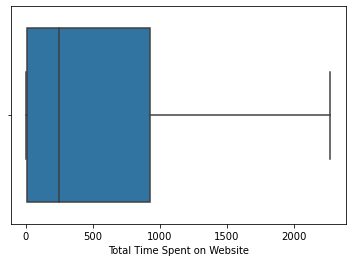

In [77]:
#Check the variable after capping the variable.
sns.boxplot(lead_1['Total Time Spent on Website'])

#### Page Views Per Visit

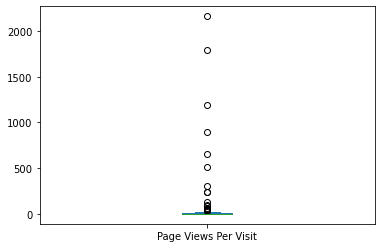

In [78]:
# Visualising the distribution of 'Page Views Per Visit':
lead['Page Views Per Visit'].value_counts().plot.box()
plt.show()

In [79]:
# Checking the outliers in percentages.
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [80]:
# Capping the variable for outliers.
Q1 = lead['Page Views Per Visit'].quantile(0.01)
Q3 = lead['Page Views Per Visit'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
lead_1 = lead.loc[(lead['Page Views Per Visit']>lower_limit) & (lead['Page Views Per Visit']<upper_limit)]

<AxesSubplot:xlabel='Page Views Per Visit'>

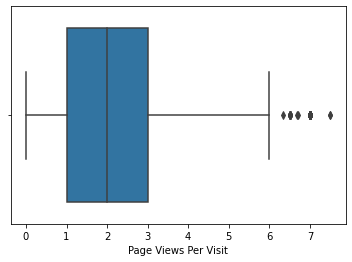

In [81]:
#Check the variable after capping the variable.
sns.boxplot(lead_1['Page Views Per Visit'])

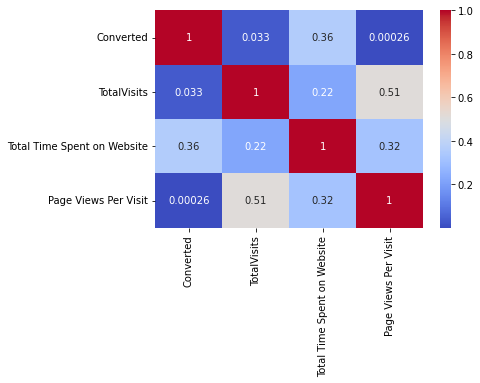

In [82]:
# Check correlation between continuous variables.
Cont_column = lead.drop(['Do Not Email','A free copy of Mastering The Interview'],1)
sns.heatmap(Cont_column.corr(), cmap="coolwarm", annot=True)
plt.show()

## Building the model

In [83]:
# Check the columns before building dummy variable.
lead_1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Lead Profile', 'A free copy of Mastering The Interview'],
      dtype='object')

#### Let's build the dummy variables before splitting

In [84]:
dummy = pd.get_dummies(lead_1,columns=['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization',
                                     'What is your current occupation','Lead Profile',
                                       'A free copy of Mastering The Interview'],drop_first=True)
dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_No lead profile,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,A free copy of Mastering The Interview_1
0,0,0.0,0,0.00,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9238,1,3.0,499,3.00,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [85]:
# Putting feature variable to X
X = dummy.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_No lead profile,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,A free copy of Mastering The Interview_1
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [86]:
# Putting converted variable to y
y = dummy['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_No lead profile,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,A free copy of Mastering The Interview_1
331,0.755617,0.780518,2.720080,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8861,-0.666897,-0.880347,-1.250109,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7080,-0.666897,-0.880347,-1.250109,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4638,-0.666897,-0.880347,-1.250109,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4472,1.162050,1.560258,0.451400,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


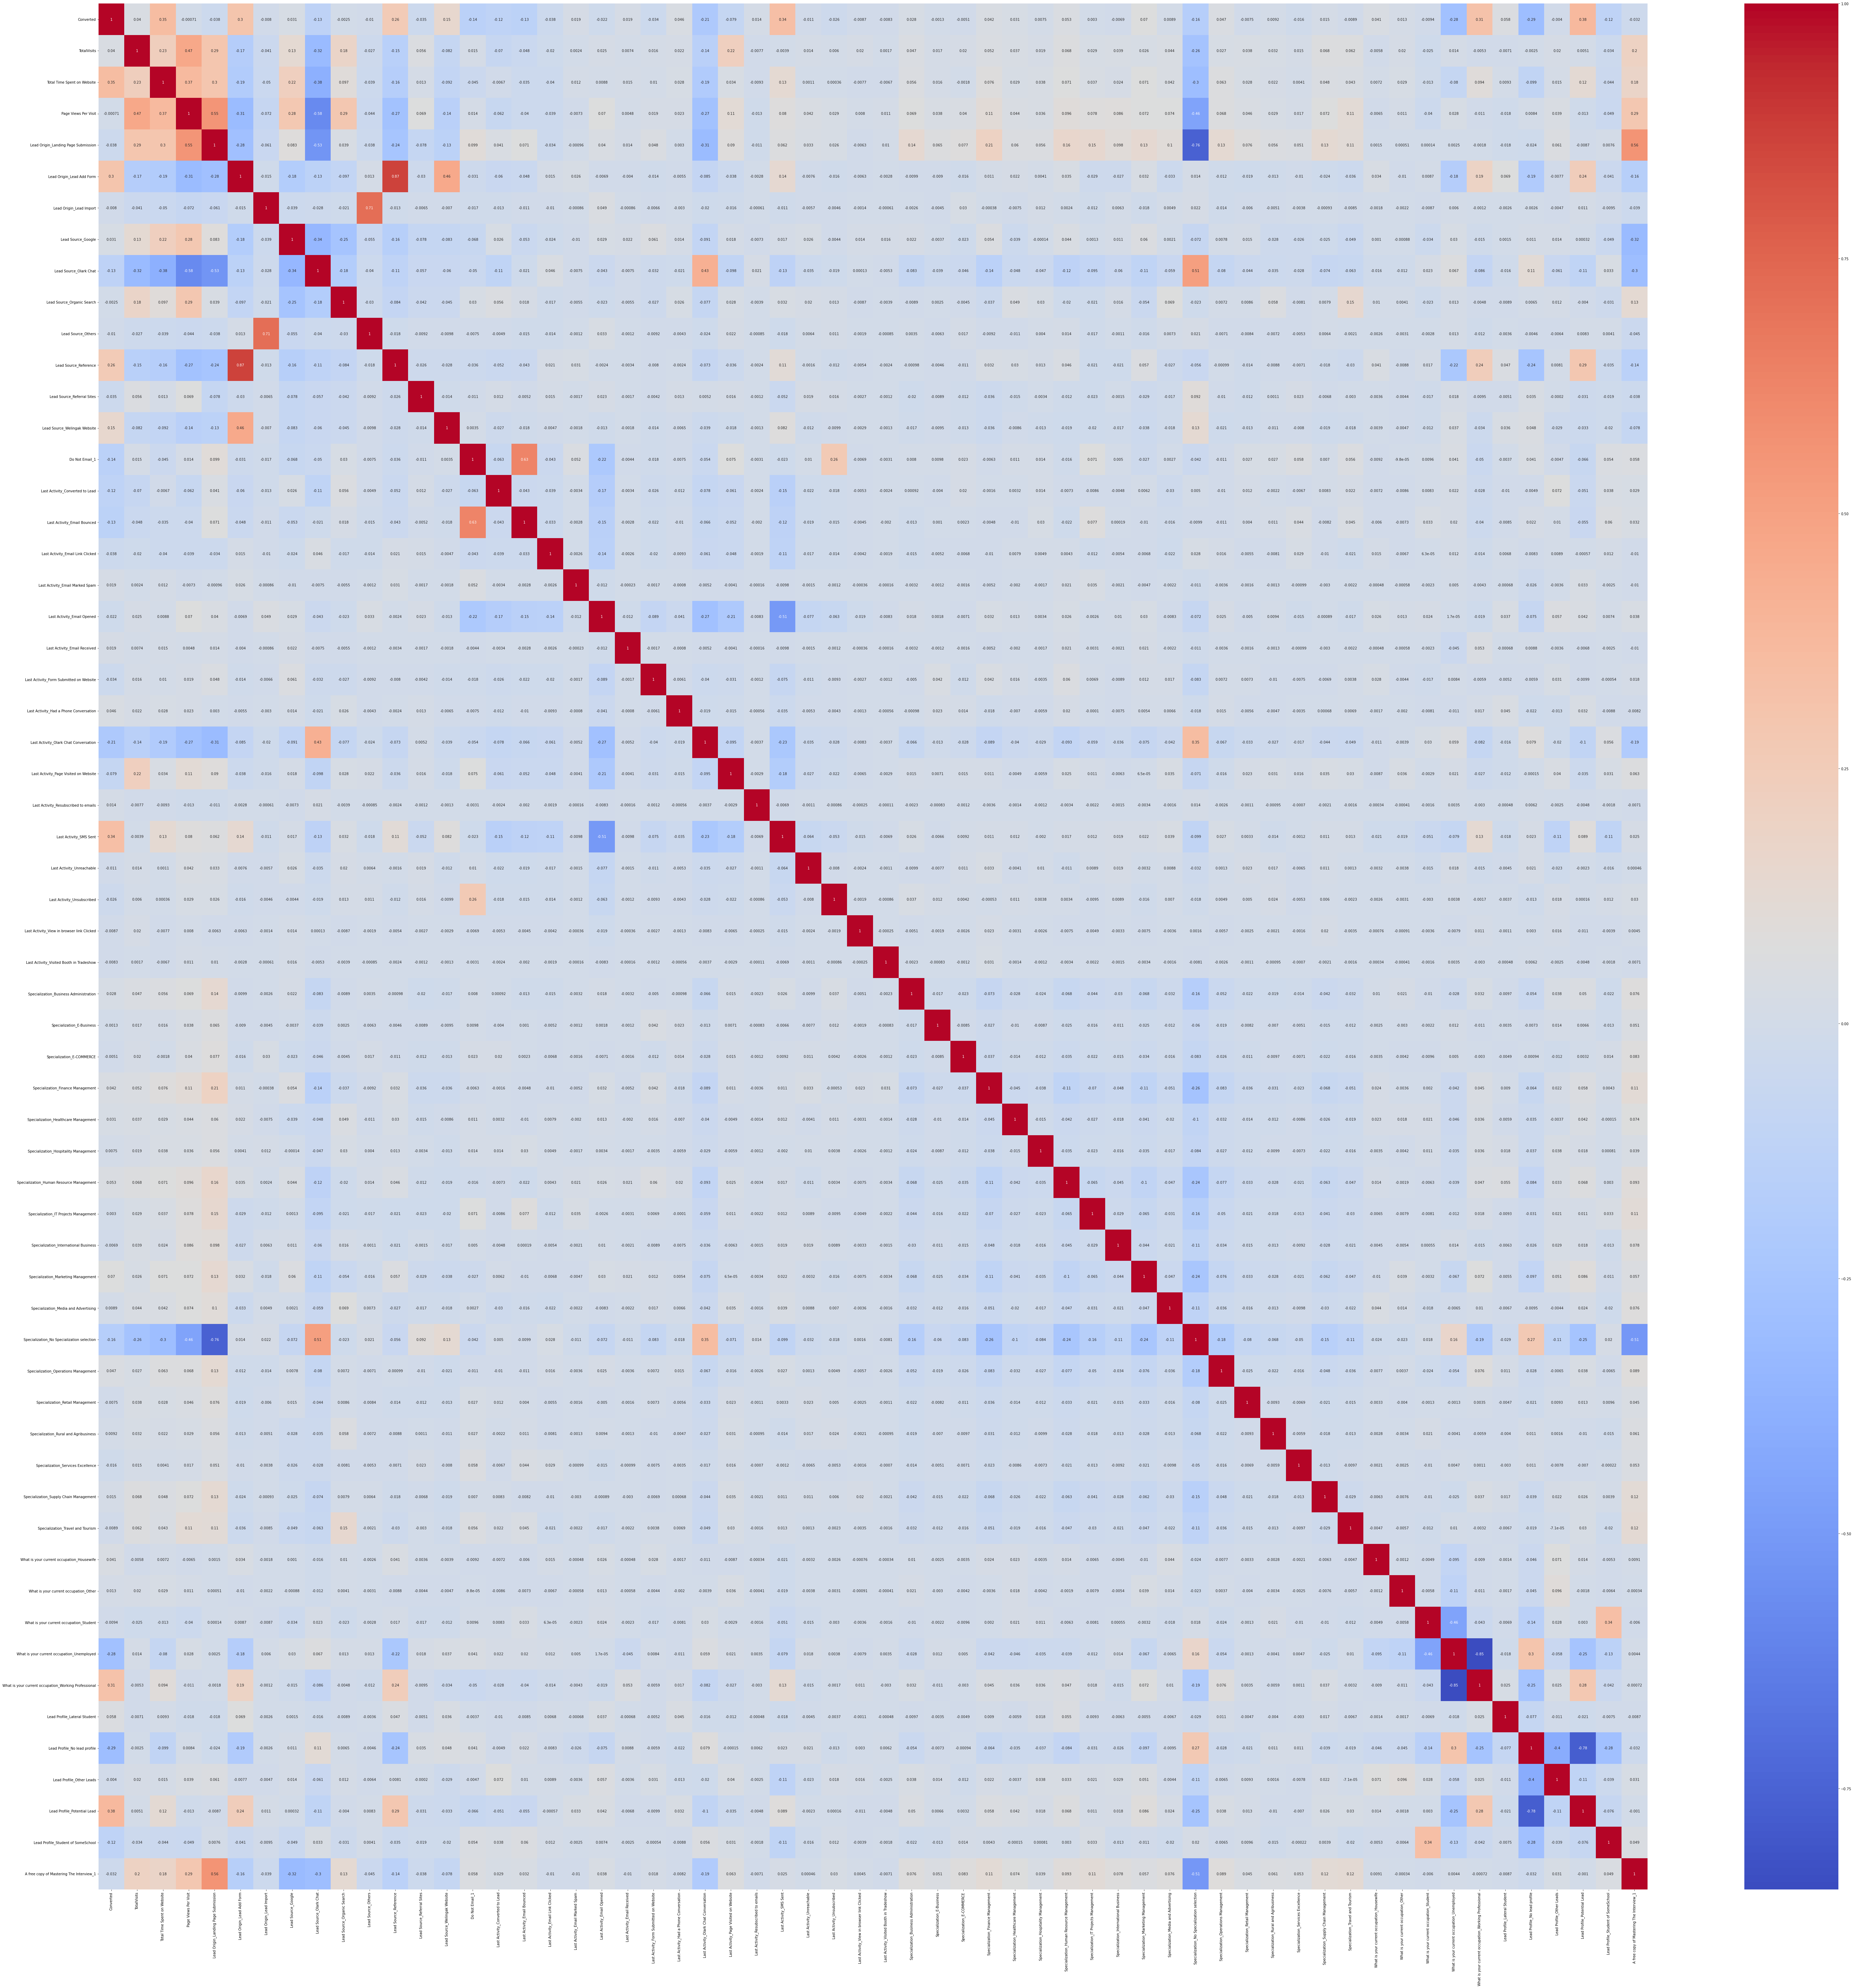

In [89]:
# Let's see the correlation matrix
plt.figure(figsize=[100,100])
sns.heatmap(dummy.corr(), cmap="coolwarm", annot=True)
plt.show()

#### Dropping highly correlated dummy variables

In [90]:
X_test = X_test.drop (['What is your current occupation_Unemployed','Lead Profile_No lead profile','Specialization_No Specialization selection'], 1)
X_train= X_train.drop(['What is your current occupation_Unemployed','Lead Profile_No lead profile','Specialization_No Specialization selection'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

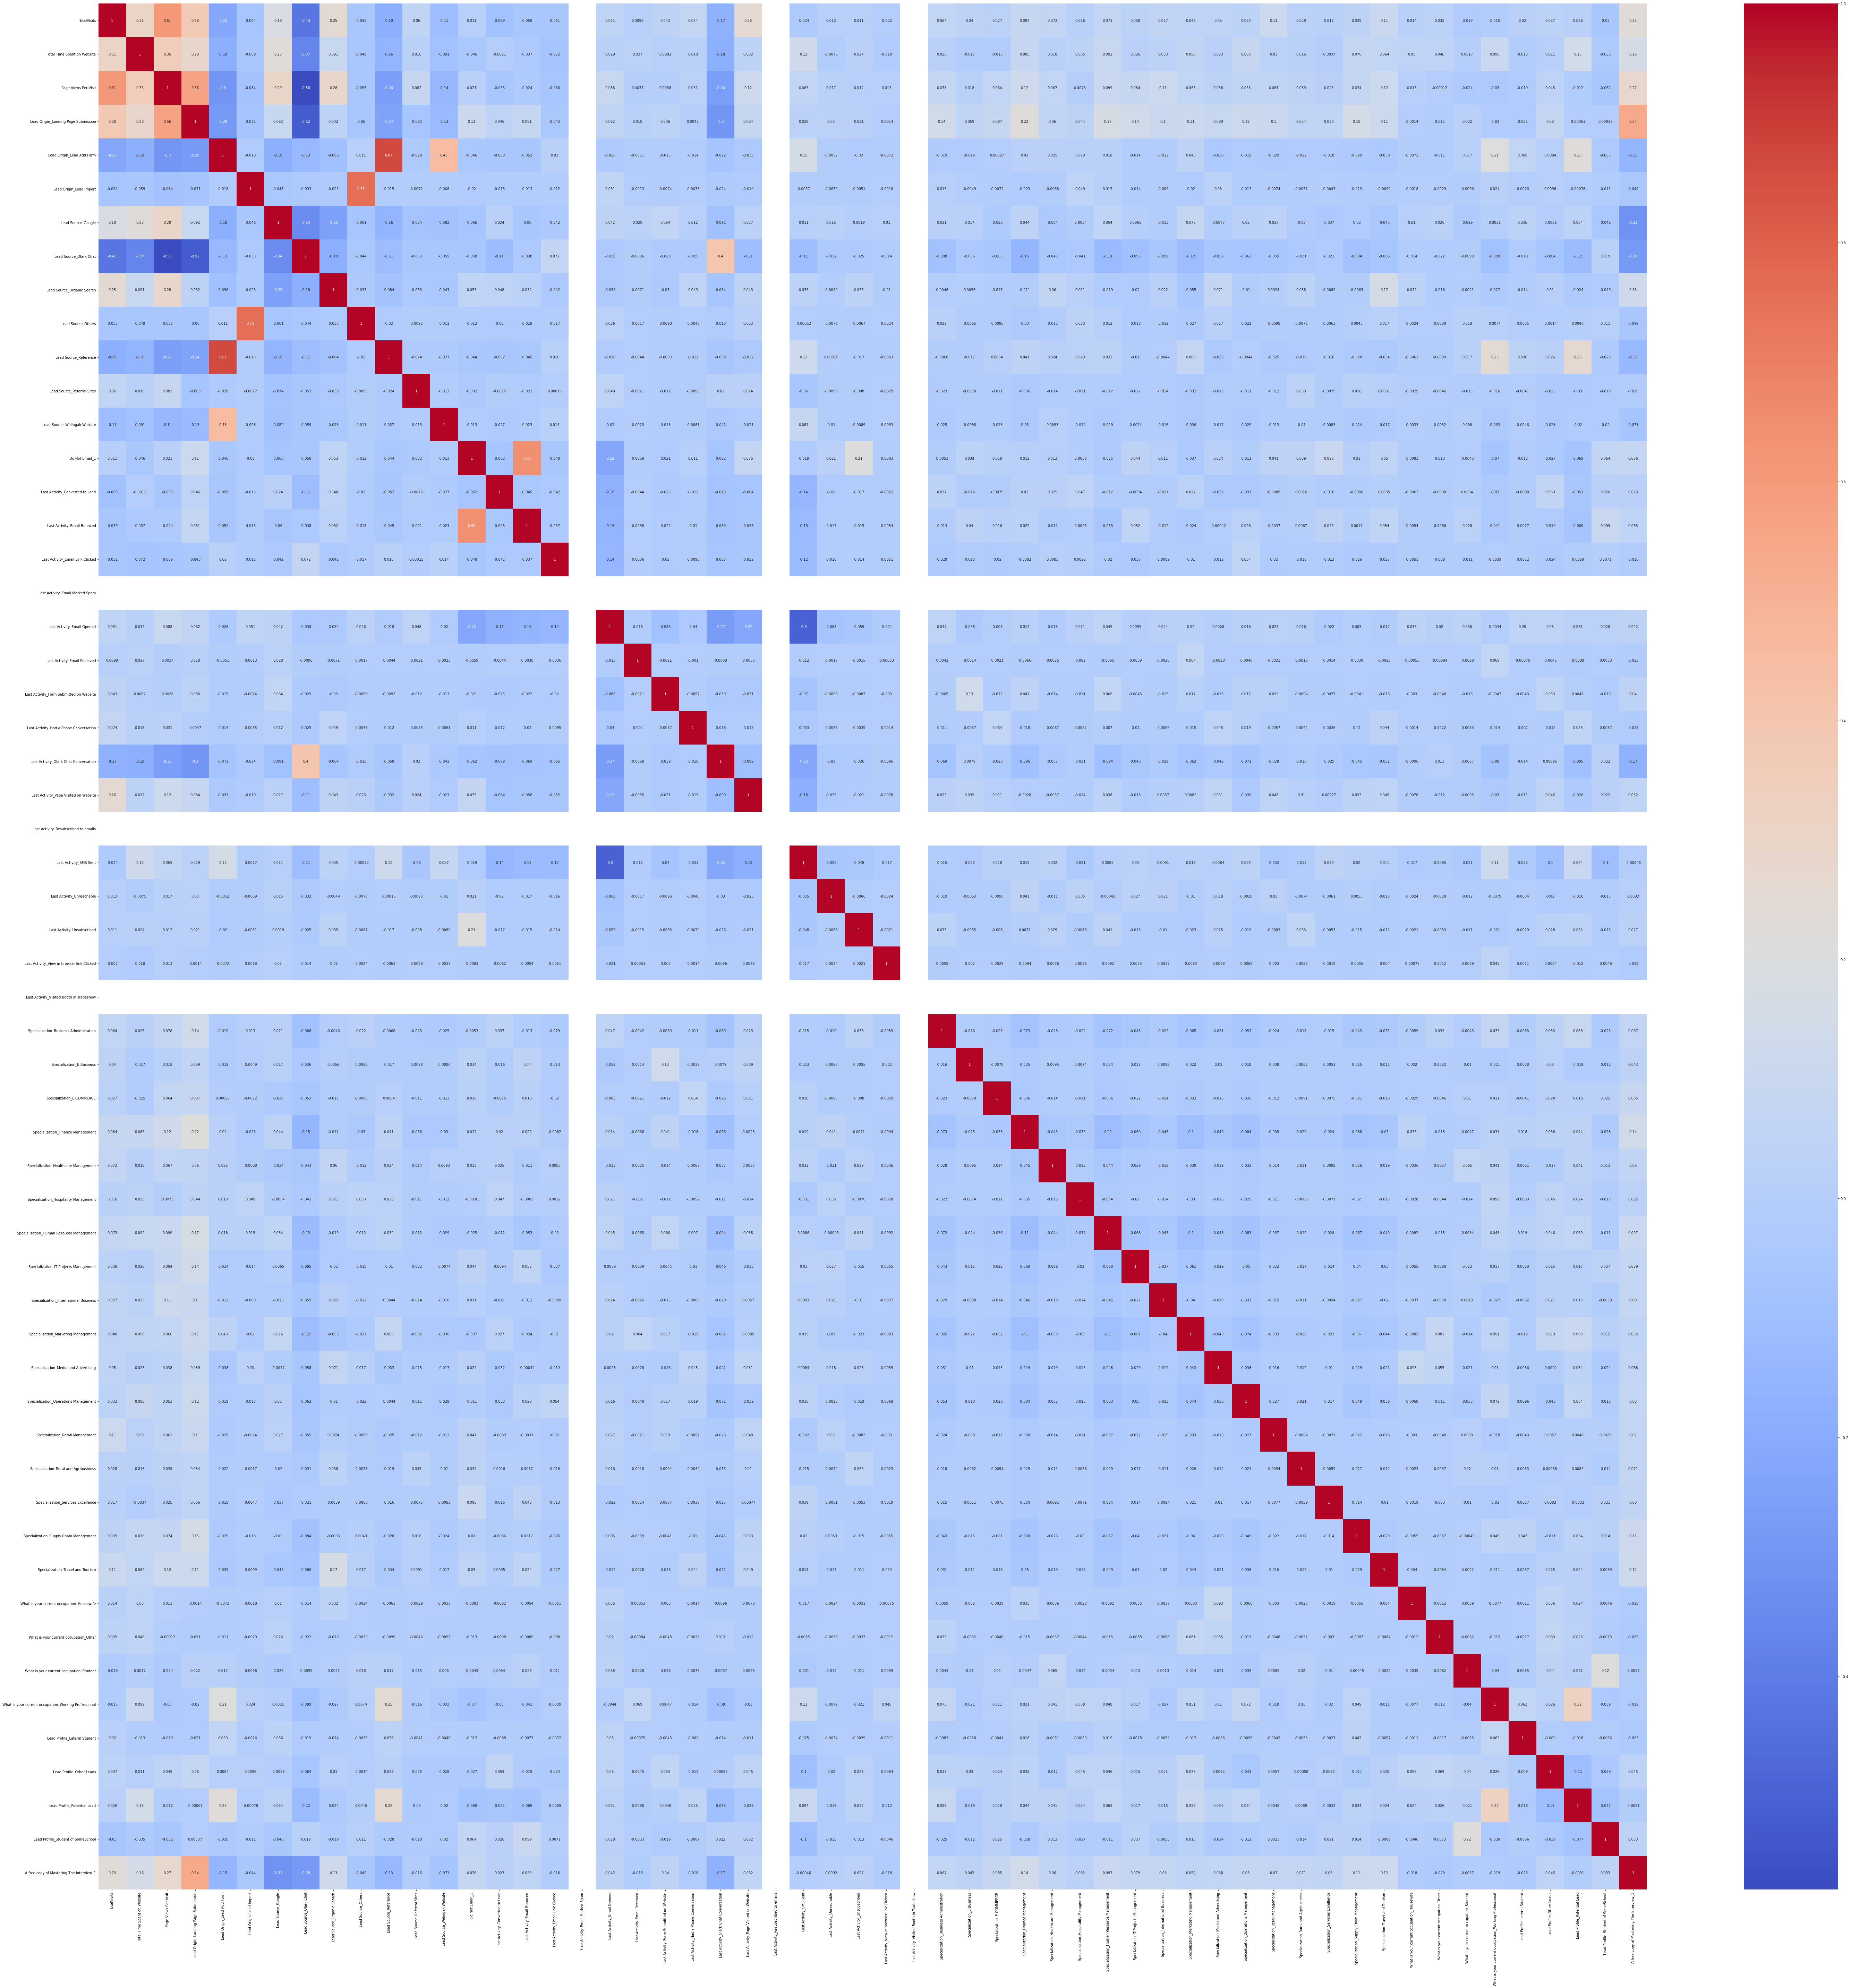

In [91]:
plt.figure(figsize=[100,100])
sns.heatmap(X_test.corr(), cmap="coolwarm", annot=True)
plt.show()

In [92]:
import statsmodels.api as sm

In [93]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6205
Model:                            GLM   Df Residuals:                     6148
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2408.9
Date:                Sat, 19 Nov 2022   Deviance:                       4817.7
Time:                        13:37:36   Pearson chi2:                 6.58e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.6915   3.76e+04      0.001      1.000   -7.37e+04    7.37e+04
TotalVisits                                              0.2409      0.064      3.744      0.000       0.115       0.367
Total Time Spent on Website                              1.0861      0.042     25.597      0.000       1.003       1.169
Page Views Per Visit                                    -0.1383      0.059     -2.350      0.019      -0.254      -0.023
Lead Origin_Landing Page Submission                     -0.5315      0.136     -3.917      0.000      -0.797      -0.266
Lead Origin_Lead Add Form                                0.7328      1.046      0.701      0.484      -1.318       2.783
Lead Origin_Lead Import                                  0.4863      0.900      0.540      0.589      -1.278       2.250
Lead Source_Google                                       0.2916      0.122      2.393      0.017       0.053       0.530
Lead Source_Olark Chat                                   1.2647      0.174      7.253      0.000       0.923       1.606
Lead Source_Organic Search                               0.2224      0.139      1.603      0.109      -0.049       0.494
Lead Source_Others                                       0.4865      0.704      0.691      0.490      -0.894       1.867
Lead Source_Reference                                    2.1882      1.073      2.040      0.041       0.086       4.290
Lead Source_Referral Sites                              -0.6459      0.393     -1.645      0.100      -1.415       0.123
Lead Source_Welingak Website                             5.1868      1.282      4.047      0.000       2.675       7.699
Do Not Email_1                                          -1.3180      0.231     -5.703      0.000      -1.771      -0.865
Last Activity_Converted to Lead                        -25.3890   3.76e+04     -0.001      0.999   -7.38e+04    7.37e+04
Last Activity_Email Bounced                            -25.2741   3.76e+04     -0.001      0.999   -7.38e+04    7.37e+04
Last Activity_Email Link Clicked                       -24.8107   3.76e+04     -0.001      0.999   -7.37e+04    7.37e+04
Last Activity_Email Marked Spam                         -2.2264   6.61e+04  -3.37e-05      1.000    -1.3e+05     1.3e+05
Last Activity_Email Opened                             -24.3750   3.76e+04     -0.001      0.999   -7.37e+04    7.37e+04
Last Activity_Email Received                            -2.4945   8.79e+04  -2.84e-05      1.000   -1.72e+05    1.72e+05
Last Activity_Form Submitted on Website                -25.1359   3.76e+04     -0.001      0.999   -7.37e+04    7.37e+04
Last Activity_Had a Phone Conversation                 -22

## Feature Selection Using RFE

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train,y_train)

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 26),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_1', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Marked Spam', False, 15),
 ('Last Activity_Email Opened', False, 23),
 ('Last Activity_Email Received', False, 34),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Las

In [97]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_1',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

##### Assessing the model with StatsModels

#### Iteration 1

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6205
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.8
Date:                Sat, 19 Nov 2022   Deviance:                       4953.7
Time:                        13:37:39   Pearson chi2:                 6.37e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6830      0.061    -27.412      0.000      -1.803      -1.563
Total Time Spent on Website                              1.0908      0.042     26.228      0.000       1.009       1.172
Lead Origin_Lead Add Form                                3.1154      0.226     13.757      0.000       2.672       3.559
Lead Origin_Lead Import                                  1.1911      0.551      2.163      0.031       0.112       2.271
Lead Source_Olark Chat                                   1.3304      0.107     12.392      0.000       1.120       1.541
Lead Source_Welingak Website                             2.7897      0.757      3.683      0.000       1.305       4.274
Do Not Email_1                                          -1.5592      0.181     -8.615      0.000      -1.914      -1.204
Last Activity_Converted to Lead                         -0.9289      0.212     -4.373      0.000      -1.345      -0.513
Last Activity_Had a Phone Conversation                   1.7791      0.688      2.587      0.010       0.431       3.127
Last Activity_Olark Chat Conversation                   -1.4668      0.170     -8.627      0.000      -1.800      -1.134
Last Activity_SMS Sent                                   1.3658      0.078     17.582      0.000       1.214       1.518
What is your current occupation_Housewife               24.3508   2.56e+04      0.001      0.999   -5.02e+04    5.03e+04
What is your current occupation_Working Professional     2.6495      0.200     13.230      0.000       2.257       3.042
Lead Profile_Lateral Student                            23.3499   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
Lead Profile_Potential Lead                              1.7404      0.100     17.445      0.000       1.545       1.936
Lead Profile_Student of SomeSchool                      -1.7759      0.444     -4.004      0.000      -2.645      -0.907
========================================================================================================================
"""

In [99]:
# Dropping the variable which have p-value > 0.05 .
col = col.drop(['What is your current occupation_Housewife'],1)

#### Iteration 2

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6205
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2483.6
Date:                Sat, 19 Nov 2022   Deviance:                       4967.3
Time:                        13:37:40   Pearson chi2:                 6.39e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6722      0.061    -27.338      0.000      -1.792      -1.552
Total Time Spent on Website                              1.0886      0.042     26.210      0.000       1.007       1.170
Lead Origin_Lead Add Form                                3.1474      0.226     13.922      0.000       2.704       3.591
Lead Origin_Lead Import                                  1.1821      0.550      2.148      0.032       0.103       2.261
Lead Source_Olark Chat                                   1.3221      0.107     12.334      0.000       1.112       1.532
Lead Source_Welingak Website                             2.7502      0.757      3.632      0.000       1.266       4.234
Do Not Email_1                                          -1.5642      0.181     -8.644      0.000      -1.919      -1.210
Last Activity_Converted to Lead                         -0.9369      0.212     -4.414      0.000      -1.353      -0.521
Last Activity_Had a Phone Conversation                   1.7694      0.687      2.575      0.010       0.422       3.116
Last Activity_Olark Chat Conversation                   -1.4712      0.170     -8.658      0.000      -1.804      -1.138
Last Activity_SMS Sent                                   1.3565      0.078     17.490      0.000       1.205       1.509
What is your current occupation_Working Professional     2.6433      0.200     13.202      0.000       2.251       3.036
Lead Profile_Lateral Student                            23.3387   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
Lead Profile_Potential Lead                              1.7357      0.100     17.423      0.000       1.540       1.931
Lead Profile_Student of SomeSchool                      -1.7824      0.443     -4.019      0.000      -2.652      -0.913
========================================================================================================================
"""

#### Iteration 3

In [101]:
# Dropping the variable which have p-value > 0.05 .
col = col.drop(['Lead Profile_Lateral Student'],1)

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6205
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2491.1
Date:                Sat, 19 Nov 2022   Deviance:                       4982.1
Time:                        13:37:40   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Check the VIF

In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.67
3,Lead Source_Olark Chat,1.62
8,Last Activity_Olark Chat Conversation,1.39
4,Lead Source_Welingak Website,1.35
11,Lead Profile_Potential Lead,1.34
0,Total Time Spent on Website,1.31
9,Last Activity_SMS Sent,1.24
10,What is your current occupation_Working Profes...,1.22
5,Do Not Email_1,1.03
12,Lead Profile_Student of SomeSchool,1.03


###### All P-values and VIF is in limit so, we will make prediction on train set

# 

### Prediction on train data set

In [104]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.71407308, 0.60409122, 0.51132409, ..., 0.05838115, 0.99565416,
       0.27584851])

##### Creating a dataframe with the actual converted and the predicted probabilitie

In [105]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values , 'convert_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,converted,convert_prob,Lead Number
0,1,0.714073,331
1,0,0.604091,8861
2,1,0.511324,7080
3,0,0.213490,4638
4,1,0.509968,4472


##### Creating new column 'predicted' with 1 if convert_prob > 0.5 else 0

In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x : 1 if x >0.5 else 0)
y_train_pred_final.head()

,converted,convert_prob,Lead Number,predicted
0,1,0.714073,331,1
1,0,0.604091,8861,1
2,1,0.511324,7080,1
3,0,0.213490,4638,0
4,1,0.509968,4472,1


In [107]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3361  461]
 [ 657 1726]]


In [108]:
# Predicted     not_convert    convert
# Actual
# not_convert        3393       429
# convert             660      1723 

In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.819822723609992


In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7242971044901385

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.8793825222396651

In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1206174777603349


In [114]:
# positive predictive value 
print (TP / float(TP+FP))

0.7892089620484682


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8364858138377302


### Plotting the ROC Curve

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.convert_prob, drop_intermediate = False )

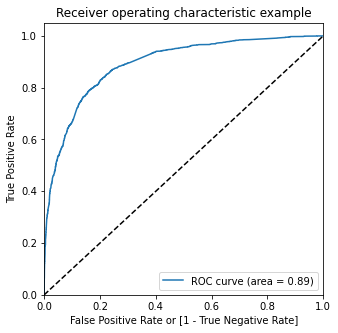

In [118]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.convert_prob)

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.convert_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,convert_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.714073,331,1,1,1,1,1,1,1,1,1,0,0
1,0,0.604091,8861,1,1,1,1,1,1,1,1,0,0,0
2,1,0.511324,7080,1,1,1,1,1,1,1,0,0,0,0
3,0,0.213490,4638,0,1,1,1,0,0,0,0,0,0,0
4,1,0.509968,4472,1,1,1,1,1,1,1,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.644641  0.966429  0.444008
0.2   0.2  0.735858  0.934536  0.611983
0.3   0.3  0.804835  0.846832  0.778650
0.4   0.4  0.820467  0.783466  0.843537
0.5   0.5  0.819823  0.724297  0.879383
0.6   0.6  0.807091  0.626941  0.919414
0.7   0.7  0.790975  0.535040  0.950549
0.8   0.8  0.767123  0.439362  0.971481
0.9   0.9  0.725222  0.300881  0.989796


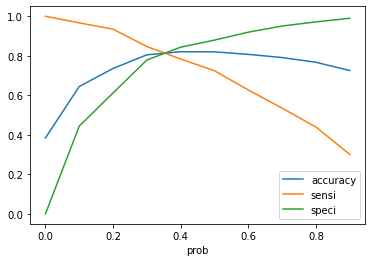

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.convert_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,converted,convert_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.714073,331,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.604091,8861,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.511324,7080,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.213490,4638,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.509968,4472,1,1,1,1,1,1,1,0,0,0,0,1


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8132151490733279

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3121,  701],
       [ 458, 1925]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8078052874527906

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.8165881737310309

In [128]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18341182626896912


In [129]:
# positive predictive value 
print (TP / float(TP+FP))

0.733054074638233


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8720312936574462


## Precision and Recall

In [131]:
#Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.733054074638233

In [132]:
#Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8078052874527906

### Precision and recall tradeoff

In [133]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6200    1
 6201    0
 6202    0
 6203    1
 6204    0
 Name: converted, Length: 6205, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       1
        ..
 6200    0
 6201    0
 6202    0
 6203    1
 6204    0
 Name: predicted, Length: 6205, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.convert_prob)

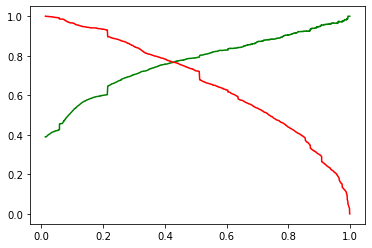

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.convert_prob)
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.convert_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 

### Making prediction on test set 

In [136]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,A free copy of Mastering The Interview_1
4154,-0.666897,-0.880347,-1.250109,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6865,0.145969,-0.590940,1.018570,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8758,-0.260464,-0.515362,-0.115769,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3144,-0.057248,-0.721818,-0.399354,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6065,-0.666897,-0.880347,-1.250109,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_1,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
4154,-0.880347,1,0,0,0,0,0,0,0,0,0,0,0
6865,-0.590940,0,0,0,0,0,0,0,0,1,0,0,0
8758,-0.515362,0,0,0,0,0,0,0,0,0,0,1,0
3144,-0.721818,0,0,0,0,0,0,0,0,0,0,0,0
6065,-0.880347,0,0,1,0,0,0,0,0,0,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
# Let's see the head
y_pred_1.head()

,0
4154,0.636536
6865,0.277056
8758,0.377688
3144,0.079343
6065,0.213490


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4154,0.636536
1,0,6865,0.277056
2,0,8758,0.377688
3,0,3144,0.079343
4,1,6065,0.213490


In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [148]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Churn_Prob
0,1,4154,0.636536
1,0,6865,0.277056
2,0,8758,0.377688
3,0,3144,0.079343
4,1,6065,0.213490


In [149]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [150]:
y_pred_final.head()

,Converted,Lead Number,Churn_Prob,final_predicted
0,1,4154,0.636536,1
1,0,6865,0.277056,0
2,0,8758,0.377688,1
3,0,3144,0.079343,0
4,1,6065,0.213490,0


In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8225563909774436

In [152]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1390,  299],
       [ 173,  798]], dtype=int64)

In [153]:
TP1 = confusion3[1,1] # true positive 
TN1 = confusion3[0,0] # true negatives
FP1 = confusion3[0,1] # false positives
FN1 = confusion3[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP1 / float(TP1+FN1)

0.8218331616889805

In [155]:
# Let us calculate specificity
TN1 / float(TN1+FP1)

0.8229721728833629

In [156]:
#Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.7274384685505926

In [157]:
#Recall
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8218331616889805

### Calculating F1 score:

In [158]:
# F1 score on training set:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1_train = 2 * (precision * recall) / (precision + recall)
F1_train

0.7686164903174286

In [159]:
# F1 score on test set:
precision_t = TP1 / (TP1 + FP1)
recall_t = TP1 / (TP1 + FN1)
F1_test = 2 * (precision_t * recall_t) / (precision_t + recall_t)
F1_test

0.7717601547388782

# Inferences:

- The Score on train and test set were:
      on training set:
        1. accuracy: 81.32%
        2. sensitivity: 80.78%
        3. specificity: 81.65%
        4. precision: 73.30%
        5. recall: 80.78%
        6. F1 score: 0.76
      on test set:
        1. accuracy: 82.25%
        2. sensitivity: 82.18%
        3. specificity: 82.29%
        4. precision: 72.24%
        5. recall: 82.18%
        6. F1 score: 0.77


### Conclusion : 

#### Conclusion on Model
##### Positive correlations
From 'Lead Origin' we have 'lead add form' high positive correalation coefficient 3.187 with conversion of customer.

In 'Lead Source' there is 'Welingak Websiite' has positive correalation coefficient 2.7448.

In 'What is your current occupation' the 'working professional' has positive correalation coefficient 2.6399 . 

In above positive relations customer converion probability in course is very high.
##### Negative correlations
From 'Lead Profile' we have 'student from some school' high negative correalation coefficient -1.7992 with conversion of customer.

Those who have select 'Yes' in 'Do not email'  has negative correlation -1.5516.

Those whose "Last activity' was 'Olark Chat Conversion' has negative correlation -1.4766.

In above negative relations customer converion probability in course is very low.


#### Conclusion on Inferences
As we can see we got the accuracy,sensitivity and specificity are nearly equal to each other in both set around 80%.

Precision is the correctly predicted positive cases by the classifier. In test it is 73.30% and in test dataset 72.24%.

The recall is calculated by taking the proportion of correctly identified positive inputs.In test it is 80.78% and in test dataset 82.18%.

F1 score or F measure is also a measure of the test’s accuracy. It is defined as a weighted mean of precision and recall. It has its maximum value at 1 and worst at 0.In test it is 0.76 and in test dataset 0.77.